In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


# Data Loading & Inspecting

In [8]:
df = pd.read_csv('world_bank_data_2025.csv')
df.head(15)


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.14015,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.38430,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.66554,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.57673,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.83906,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN
5,Aruba,aw,2015,0.474764,2.962907e+09,27458.22533,NaN,0.157925,6.831287,-0.623626,3.994142,NaN,NaN,NaN,2.838144e+09,NaN
6,Aruba,aw,2016,-0.931196,2.983635e+09,27441.52966,NaN,7.982852,-1.002800,1.719625,4.731778,NaN,NaN,NaN,2.848406e+09,NaN
7,Aruba,aw,2017,-1.028282,3.092429e+09,28440.05196,NaN,9.789287,-3.178167,7.048533,1.119795,NaN,NaN,NaN,2.921801e+09,NaN
8,Aruba,aw,2018,3.626041,3.276184e+09,30082.12764,NaN,2.453045,3.462030,2.397085,-0.591367,NaN,NaN,NaN,3.061557e+09,NaN
9,Aruba,aw,2019,4.257462,3.395799e+09,31096.20507,NaN,-0.299776,6.017816,-2.232440,2.497110,NaN,NaN,NaN,3.242394e+09,NaN


In [ ]:
df.describe()


# Note Data Duration (2010-2025):
# KPIs World Data:
# Mean World Inflation Percentage: 6.23%
# Mean Unemployment percentage: 7.8%
# GPD Capita Mean: 18483 USD  ( GDP per capita is the average income per person, calculated by dividing the total economic output (GDP) by the population.)
# GDP Growth Rate Annual Mean: 2.8%
# Intrest Rate Mean: 5.4%
# Government Expense (Percentage of GDP Mean) : 27.32%
# Public Debt (% of GDP) mean: 61%


,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
count,3472.000000,2694.000000,2.933000e+03,2938.000000,2795.000000,1735.000000,2904.000000,2912.000000,2563.000000,1820.000000,1829.000000,1833.000000,2.796000e+03,852.000000
mean,2017.500000,6.233154,3.964324e+11,18483.495612,7.841141,5.405051,6.634865,2.853544,-2.363241,27.325359,26.677467,16.969924,4.142238e+11,61.863736
std,4.610436,19.726903,1.749315e+12,27301.814024,5.964358,9.740924,25.820196,6.053786,13.740986,12.642464,18.116253,8.218539,1.799783e+12,40.409792
min,2010.000000,-6.687321,3.210541e+07,193.007146,0.100000,-81.132121,-28.760135,-54.336155,-60.877754,0.000136,0.000081,0.000063,5.107533e+07,1.845685
25%,2013.750000,1.402112,6.264757e+09,2280.748732,3.611000,1.734057,1.218347,0.997032,-7.496525,17.511484,17.639153,12.285344,7.475538e+09,33.894232
50%,2017.500000,3.213523,2.587360e+10,6827.668144,5.771000,5.079009,3.223184,3.100442,-2.656009,26.000850,24.821425,16.321438,2.986520e+10,51.651469
75%,2021.250000,6.186626,1.874940e+11,23727.024578,10.731500,8.869434,6.905463,5.355110,1.854710,34.884582,32.700782,21.448658,1.972530e+11,81.930649
max,2025.000000,557.201817,2.772070e+13,256580.515100,35.359000,61.882604,921.535652,86.826748,235.750605,103.725787,344.999451,147.640196,2.757610e+13,249.366027


In [6]:
df.shape

(3472, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

In [10]:
df.isnull().sum()


country_name                          0
country_id                            0
year                                  0
Inflation (CPI %)                   778
GDP (Current USD)                   539
GDP per Capita (Current USD)        534
Unemployment Rate (%)               677
Interest Rate (Real, %)            1737
Inflation (GDP Deflator, %)         568
GDP Growth (% Annual)               560
Current Account Balance (% GDP)     909
Government Expense (% of GDP)      1652
Government Revenue (% of GDP)      1643
Tax Revenue (% of GDP)             1639
Gross National Income (USD)         676
Public Debt (% of GDP)             2620
dtype: int64

# Global Trend Analysis

In [27]:
# World Trends

world_trends = df.groupby("year")[[
    "Inflation (CPI %)",
    "GDP Growth (% Annual)",
    "Unemployment Rate (%)",
    "Interest Rate (Real, %)",
    "Public Debt (% of GDP)"
]].mean().reset_index()

C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_14444\2265022823.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=world_trends, x='year', y='Inflation (CPI %)', label='Inflation (CPI %)', palette = 'viridis')
C:\Users\SauravPayal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


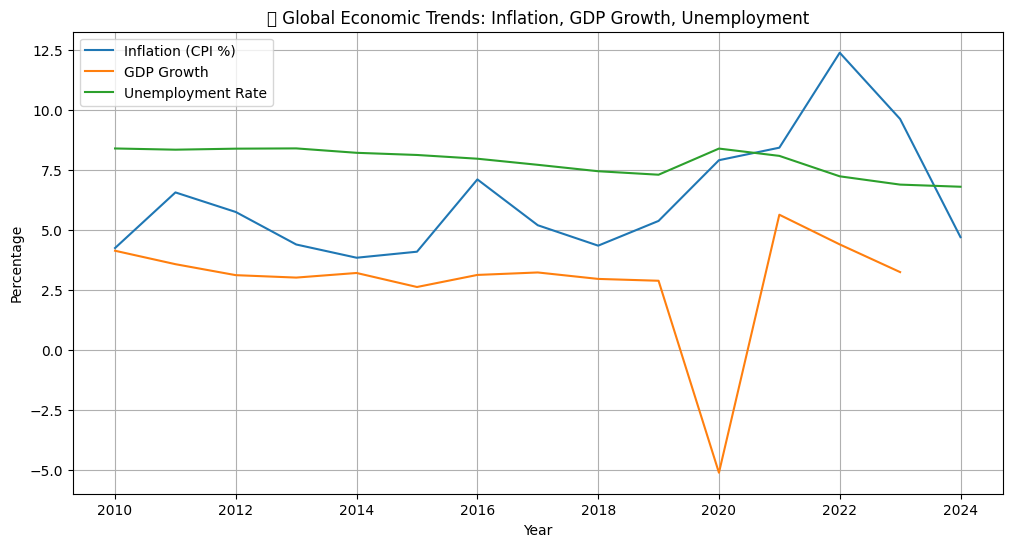

In [ ]:


# Plot Global trends Over Time
#1) Inflation, GDP Growth, Unemployment:

plt.figure(figsize=(12, 6))
sns.lineplot(data=world_trends, x='year', y='Inflation (CPI %)', label='Inflation (CPI %)', palette = 'viridis')
sns.lineplot(data=world_trends, x='year', y='GDP Growth (% Annual)', label='GDP Growth')
sns.lineplot(data=world_trends, x='year', y='Unemployment Rate (%)', label='Unemployment Rate')
plt.title("🌍 Global Economic Trends: Inflation, GDP Growth, Unemployment")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# GDP at an all time low in 2020, During Covid.--Makes sense
#Unemployment at an all time high during covid and slight decreasing rate after that--Valid
#Inflation at an all time high during 2022 and now decreasing and currently in nominal range
#GDP after recovering after covid, now again decreasing--should look into this further --also Concerning


C:\Users\SauravPayal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


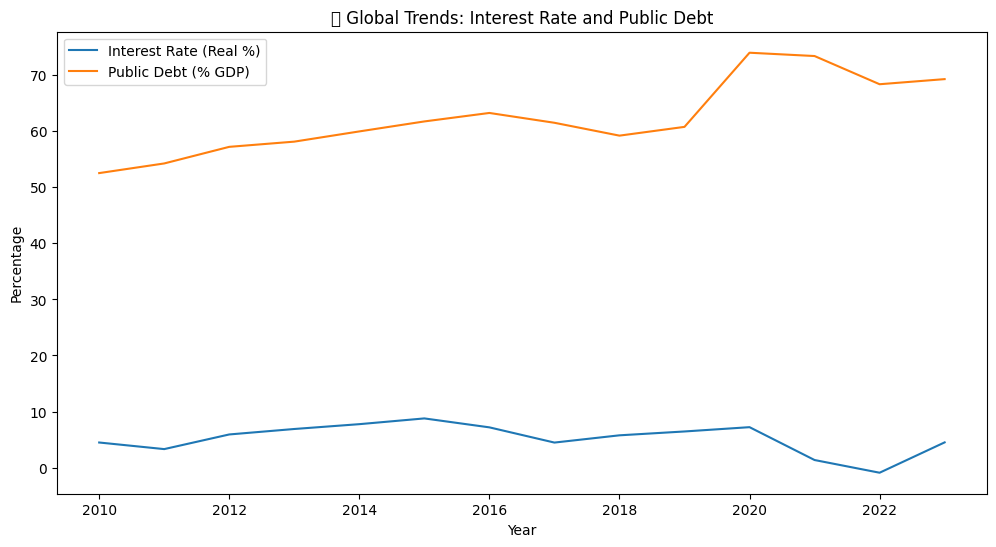

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_trends, x='year', y='Interest Rate (Real, %)', label='Interest Rate (Real %)')
sns.lineplot(data=world_trends, x='year', y='Public Debt (% of GDP)', label='Public Debt (% GDP)')
plt.title("🌍 Global Trends: Interest Rate and Public Debt")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend()
plt.show()


C:\Users\SauravPayal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


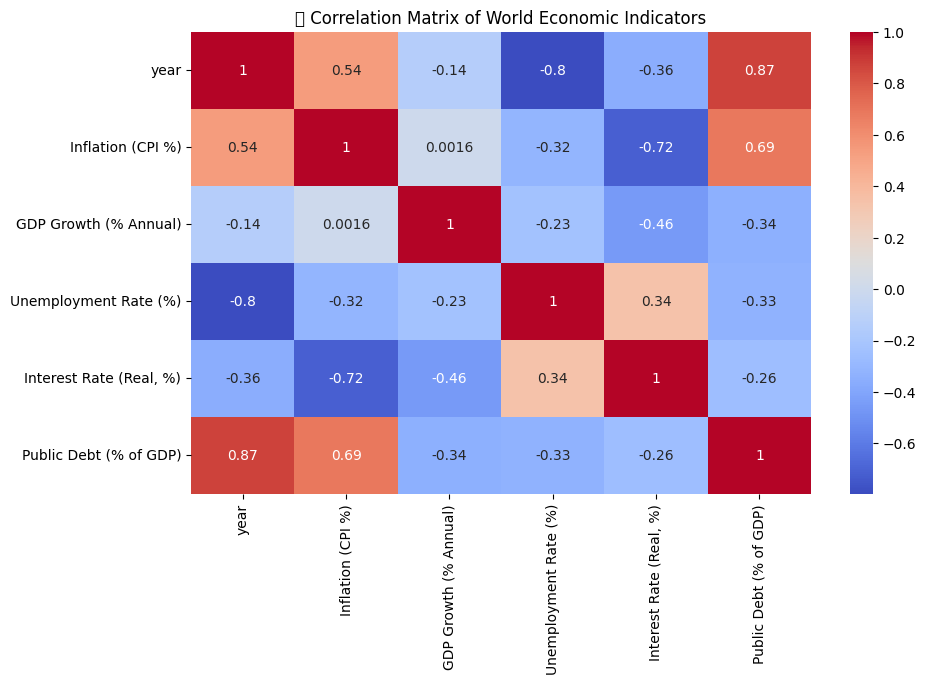

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(world_trends.corr(), annot=True, cmap="coolwarm")
plt.title("🔗 Correlation Matrix of World Economic Indicators")
plt.show()


# Top Contries Economic Indicators

In [34]:
df.columns

Index(['country_name', 'country_id', 'year', 'Inflation (CPI %)',
       'GDP (Current USD)', 'GDP per Capita (Current USD)',
       'Unemployment Rate (%)', 'Interest Rate (Real, %)',
       'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)',
       'Current Account Balance (% GDP)', 'Government Expense (% of GDP)',
       'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)',
       'Gross National Income (USD)', 'Public Debt (% of GDP)'],
      dtype='object')

In [63]:
#Since 2023 has the least amount of NaNs

latest_data = df[df['year'] == 2023]

# top 5 countries by GDP (you can change the metric here)

# top_countries = latest_data[['country_name', 'GDP (Current USD)']]\
#      .dropna().sort_values(by='GDP (Current USD)', ascending=False).head(5)['country_name'].tolist()

top_countries = latest_data[['country_name', 'GDP (Current USD)']].sort_values(by = 'GDP (Current USD)', ascending=False).head(5)

print(top_countries)  # should list 10 country names


       country_name  GDP (Current USD)
3261  United States       2.772070e+13
589           China       1.779480e+13
813         Germany       4.525700e+12
1581          Japan       4.204490e+12
1437          India       3.567550e+12


C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_14444\1419915192.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SauravPayal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


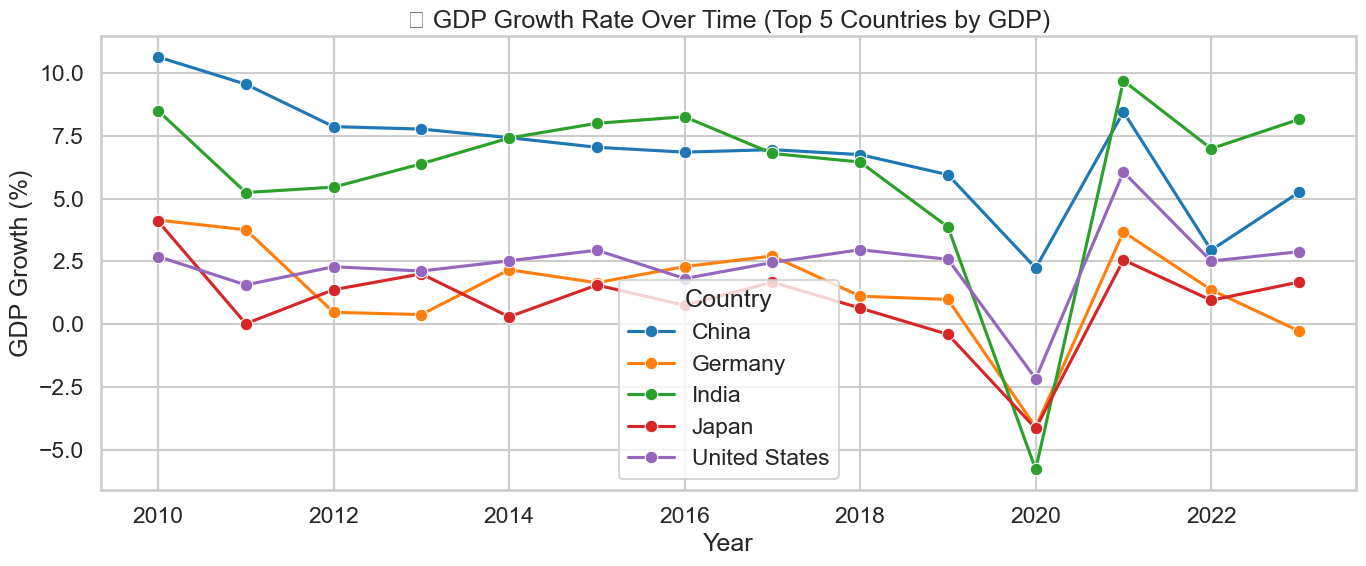

In [71]:
#Top Countries GDP Growth Rate Percentage    

top_df = df[df['country_name'].isin(top_countries['country_name'])]

plt.figure(figsize=(14, 6))
sns.lineplot(data=top_df, x='year', y='GDP Growth (% Annual)', hue='country_name', marker='o')
plt.title('📈 GDP Growth Rate Over Time (Top 5 Countries by GDP)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
df.columns

Index(['country_name', 'country_id', 'year', 'Inflation (CPI %)',
       'GDP (Current USD)', 'GDP per Capita (Current USD)',
       'Unemployment Rate (%)', 'Interest Rate (Real, %)',
       'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)',
       'Current Account Balance (% GDP)', 'Government Expense (% of GDP)',
       'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)',
       'Gross National Income (USD)', 'Public Debt (% of GDP)'],
      dtype='object')

C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_14444\2160545848.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SauravPayal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


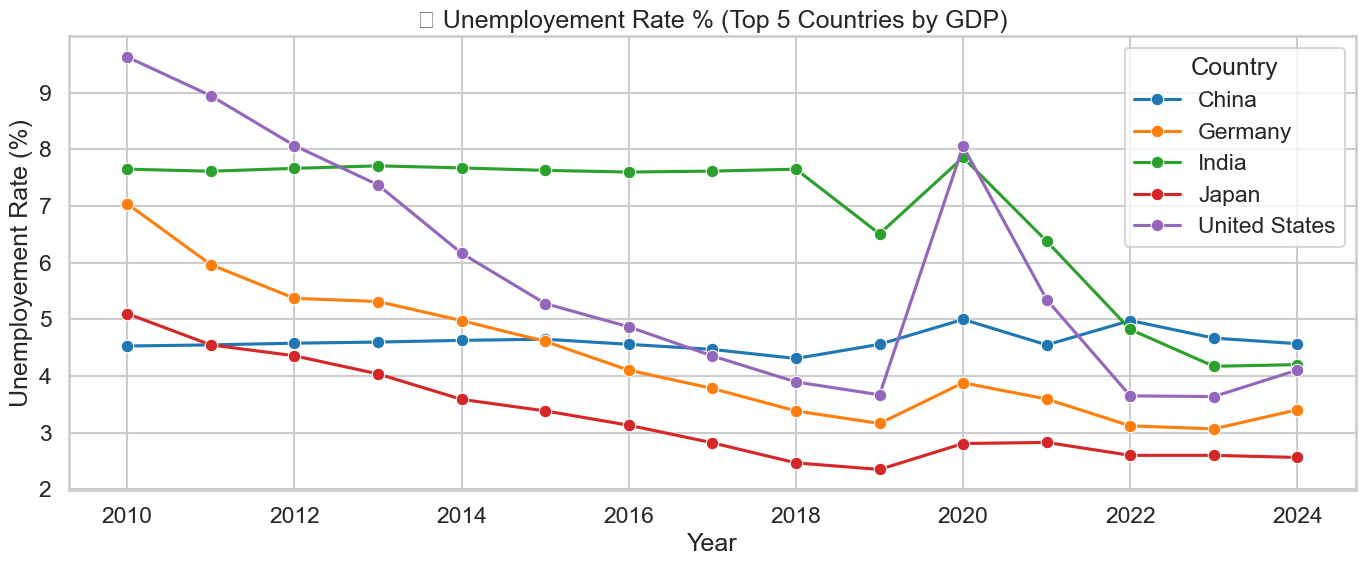

In [73]:
#Top Countries Unemployement Rate 

top_df = df[df['country_name'].isin(top_countries['country_name'])]

plt.figure(figsize=(14, 6))
sns.lineplot(data=top_df, x='year', y='Unemployment Rate (%)', hue='country_name', marker='o')
plt.title('📈 Unemployement Rate % (Top 5 Countries by GDP)')
plt.xlabel('Year')
plt.ylabel('Unemployement Rate (%)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_14444\1727674090.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SauravPayal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


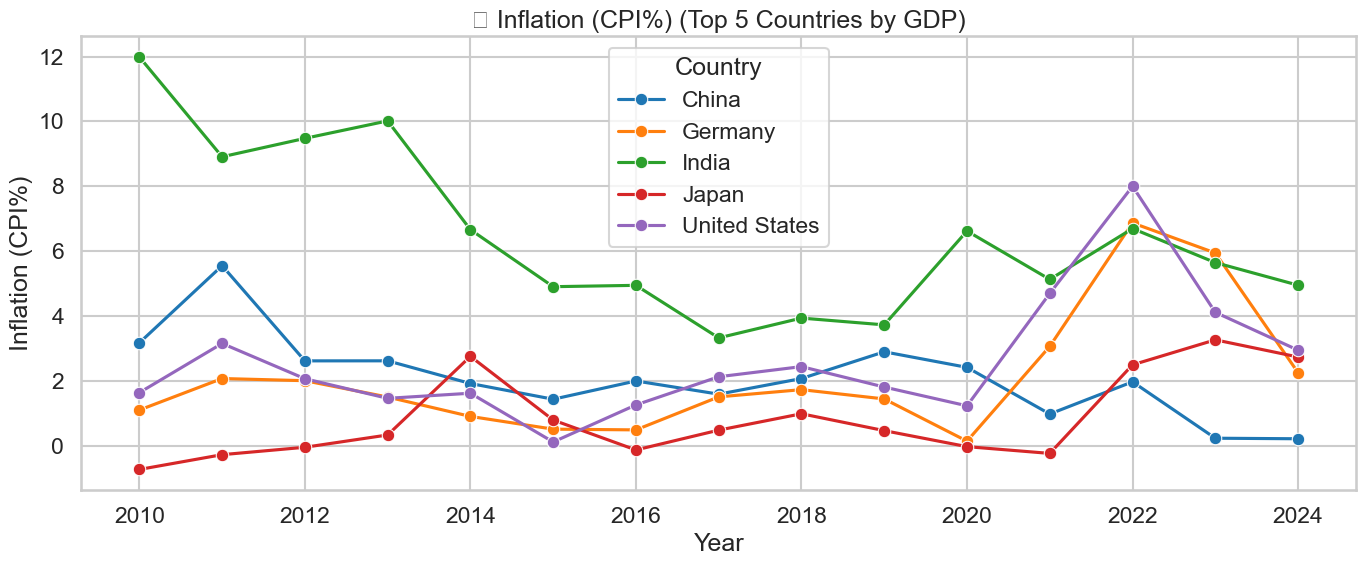

In [ ]:
#Top Countries Inflation Rate 

top_df = df[df['country_name'].isin(top_countries['country_name'])]

plt.figure(figsize=(14, 6))
sns.lineplot(data=top_df, x='year', y='Inflation (CPI %)', hue='country_name', marker='o')
plt.title('📈 Inflation (CPI%) (Top 5 Countries by GDP)')
plt.xlabel('Year')
plt.ylabel('Inflation (CPI%)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_14444\374651713.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for main title
C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_14444\374651713.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for main title
C:\Users\SauravPayal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SauravPayal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


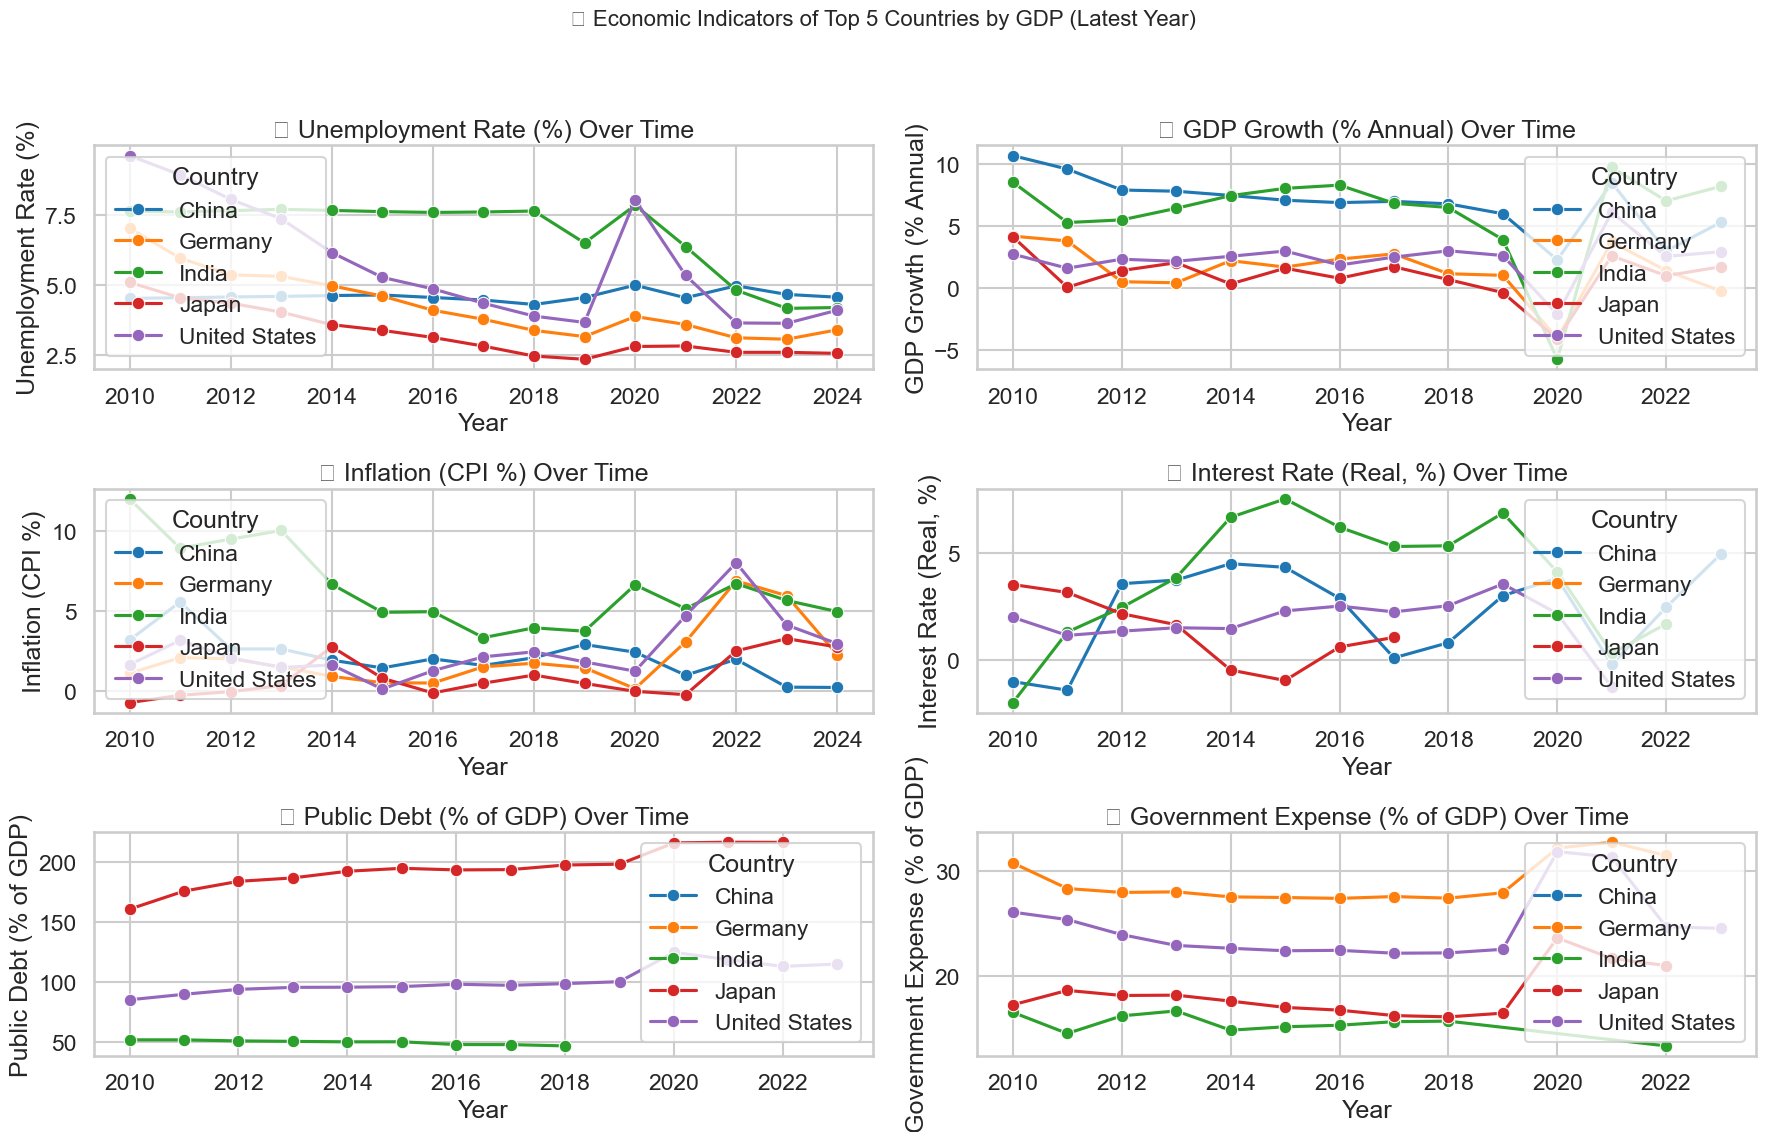

In [76]:
# Boss Sub Plots
# Filter only top 5 countries' data
top_df = df[df['country_name'].isin(top_countries['country_name'])]

# Metrics to plot (column name : pretty label)
metrics = {
    "Unemployment Rate (%)": "Unemployment Rate (%)",
    "GDP Growth (% Annual)": "GDP Growth (% Annual)",
    "Inflation (CPI %)": "Inflation (CPI %)",
    "Interest Rate (Real, %)": "Interest Rate (Real, %)",
    "Public Debt (% of GDP)": "Public Debt (% of GDP)",
    "Government Expense (% of GDP)":"Government Expense (% of GDP)"
}

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()  # Flatten to 1D list

# Plot each metric
for i, (col, label) in enumerate(metrics.items()):
    sns.lineplot(data=top_df, x='year', y=col, hue='country_name', marker='o', ax=axes[i])
    axes[i].set_title(f'📊 {label} Over Time')
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel(label)
    axes[i].grid(True)
    axes[i].legend(title="Country")

# Hide any extra subplots if metrics < total subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove empty axes

plt.suptitle("📈 Economic Indicators of Top 5 Countries by GDP (Latest Year)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for main title
plt.show()